## Example notebook to load tracks into dictionary and plot the PDF and weighted PDF of a random track

### Additionaly, this notebook demonstrates the similarity between the weighted and unweighted PDFs for each track.

In [1]:
# Autoreload libraries
%load_ext autoreload
%autoreload 2

In [3]:
from utils import Track
import pickle
import matplotlib.pyplot as plt

TRACKS_FILE = 'tracks.pkl'

In [4]:
# Open tracks file with pickle
with open(TRACKS_FILE, 'rb') as f:
    tracks = pickle.load(f)

# Load midi_range
midi_range = Track.midi_range

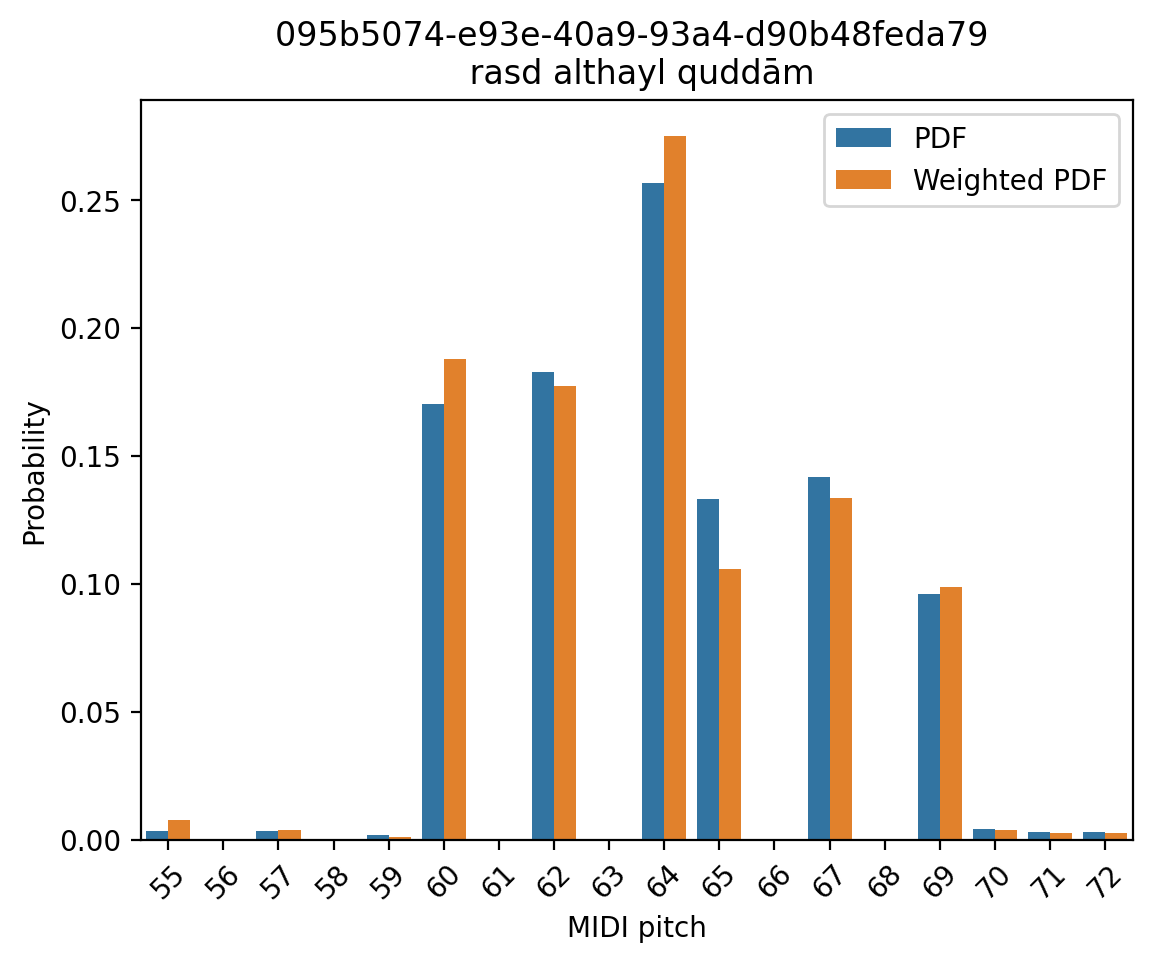

In [5]:
# Select random track and plot pdfs
track= tracks['095b5074-e93e-40a9-93a4-d90b48feda79']
track.plot_pdfs()

In the example above, one could argue that when accounting for the duration of the notes some differences can be seen in, for example, the third (midi note 65), the overall shape of the distribution remains the same. Motivated by this we used cosine similarity to measure the similarities between the count-based and duration-based probability distributions, and group them by tab.

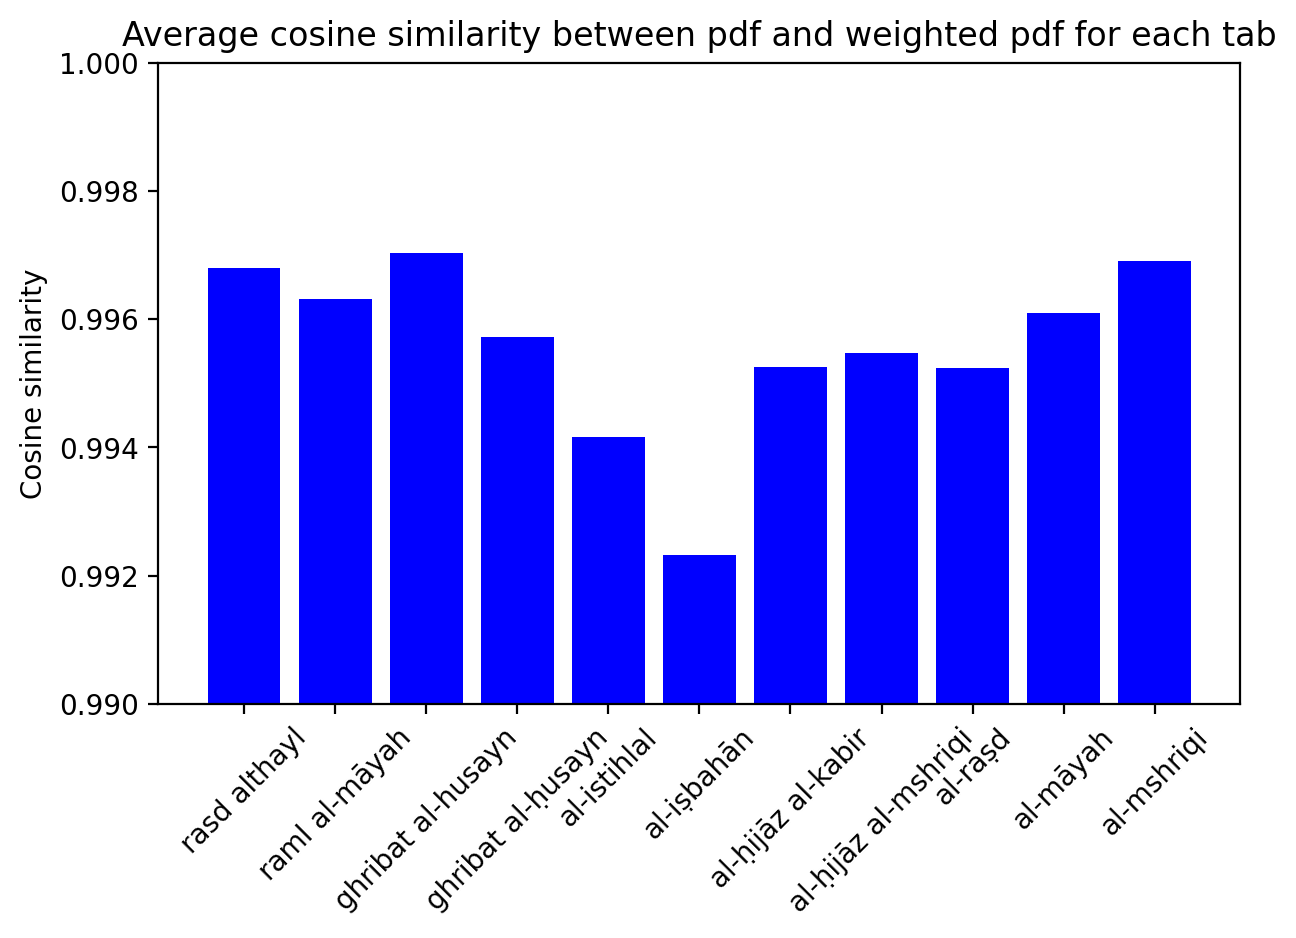

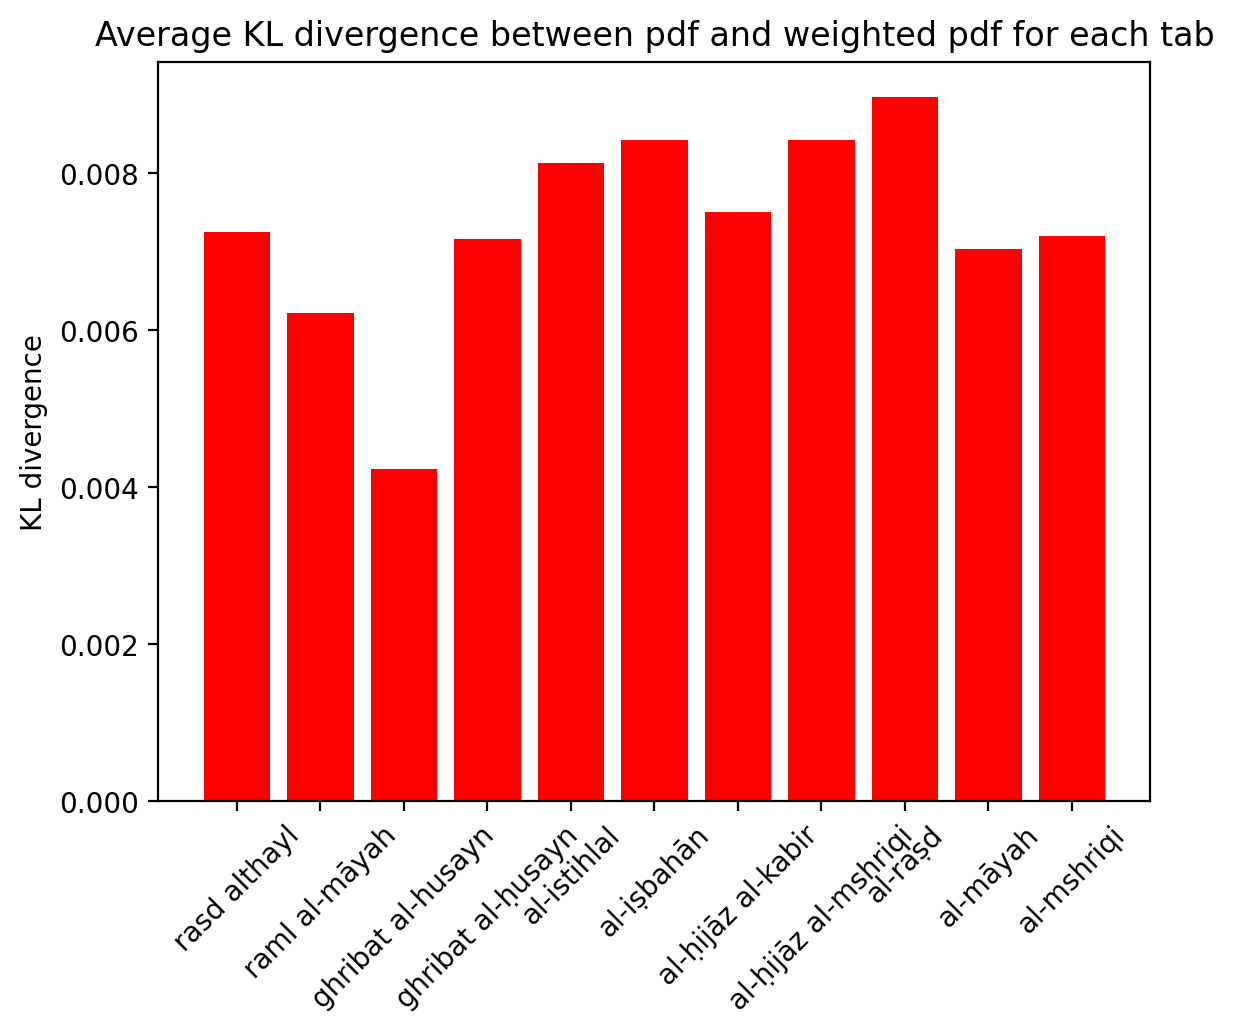

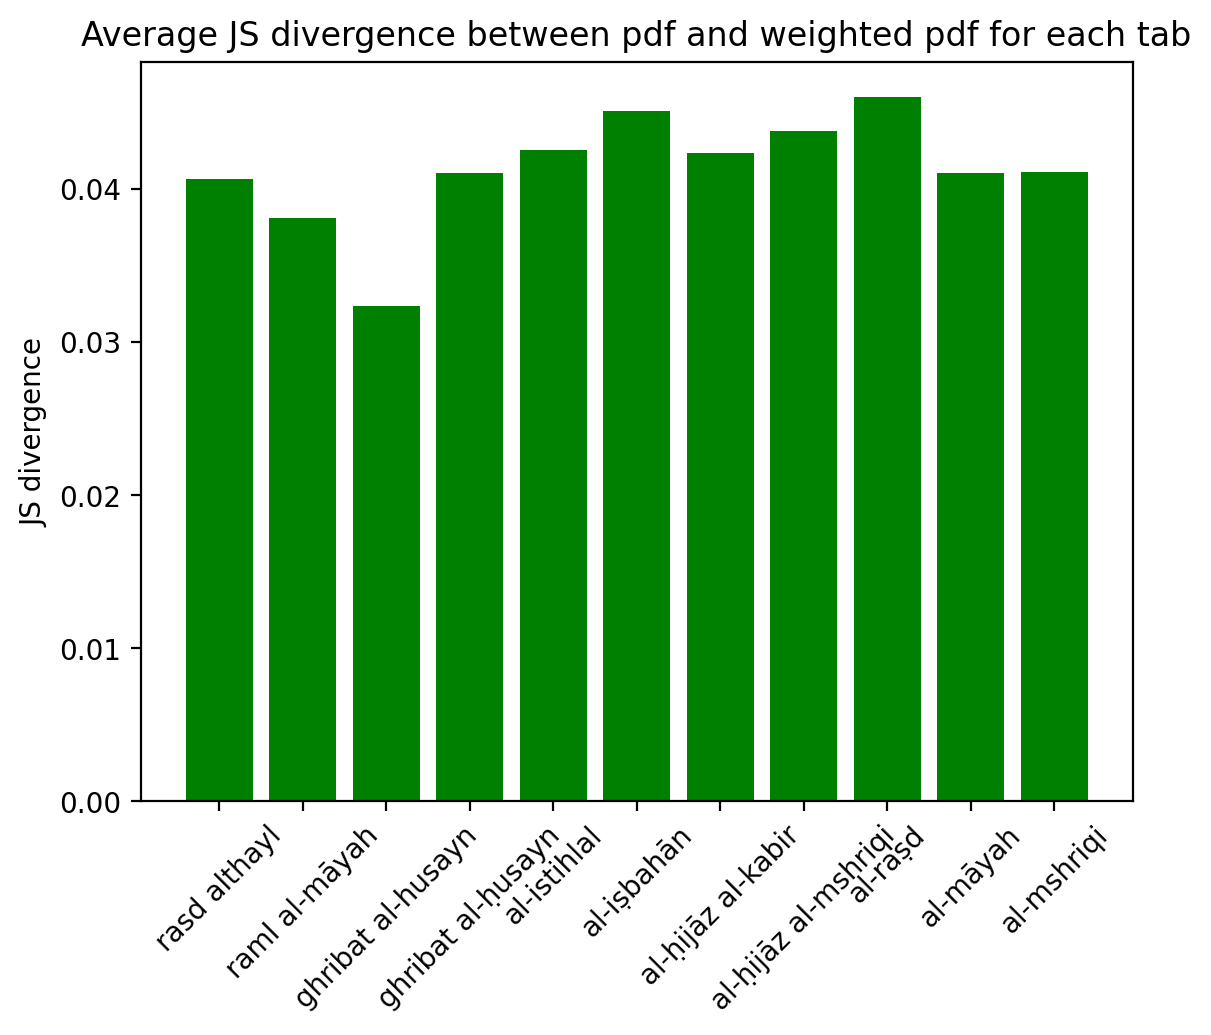

In [6]:
# Calculate similarily metrics between pdf and weighted pdf for every track, and store them in a dictionary for each tab
tubu_cos_sim = {}
tubu_kl_div = {}
tubu_js_div = {}
for track in tracks.values():
    cos_sim, kl_div, js_div = track.pdf_similarity()
    tab = track.tab
    if tab not in tubu_cos_sim:
        tubu_cos_sim[tab] = []
        tubu_kl_div[tab] = []
        tubu_js_div[tab] = []
    tubu_cos_sim[tab].append(cos_sim)
    tubu_kl_div[tab].append(kl_div)
    tubu_js_div[tab].append(js_div)

# Calculate average similarity metrics for each tab
tubu_avg_cos_sim = {}
tubu_avg_kl_div = {}
tubu_avg_js_div = {}
for tab in tubu_cos_sim.keys():
    tubu_avg_cos_sim[tab] = sum(tubu_cos_sim[tab]) / len(tubu_cos_sim[tab])
    tubu_avg_kl_div[tab] = sum(tubu_kl_div[tab]) / len(tubu_kl_div[tab])
    tubu_avg_js_div[tab] = sum(tubu_js_div[tab]) / len(tubu_js_div[tab])

# Plot average similarity metrics for each tab

# Cosine similarity
plt.bar(tubu_avg_cos_sim.keys(), tubu_avg_cos_sim.values(), color='b', label='Cosine similarity')
plt.title('Average cosine similarity between pdf and weighted pdf for each tab')
plt.xticks(rotation=45)
plt.ylim(0.99, 1)
plt.ylabel('Cosine similarity')
plt.tight_layout()
plt.show()

# KL divergence
plt.bar(tubu_avg_kl_div.keys(), tubu_avg_kl_div.values(), color='r', label='KL divergence')
plt.title('Average KL divergence between pdf and weighted pdf for each tab')
plt.xticks(rotation=45)
plt.ylabel('KL divergence')
plt.show()

# JS divergence
plt.bar(tubu_avg_js_div.keys(), tubu_avg_js_div.values(), color='g', label='JS divergence')
plt.title('Average JS divergence between pdf and weighted pdf for each tab')
plt.xticks(rotation=45)
plt.ylabel('JS divergence')
plt.show()

The results illustrate the average cosine similarity between weighted and unweighted probability distributions for each tab. It can be observed that the cosine similarity between the probability distributions of a track consistently exceeds 0.99 for all instances. This indicates that there is minimal divergence between pitch histograms when factoring in note duration as opposed to solely considering note occurrences.